# Generating the UNSW-NB15 sub-datasets

In [1]:
import numpy as np  # for array
import pandas as pd  # for csv files and dataframe
import matplotlib.pyplot as plt  # for plotting
import seaborn as sns  # plotting
from scipy import stats

import pickle  # To load data int disk

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, make_scorer
from sklearn.metrics import auc, f1_score, roc_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_validate, cross_val_predict

In [2]:
# This csv file contains the preprocessed UNSW-NB15 dataset
data = pd.read_csv('../datasets/UNSWNB-15.csv', low_memory=False)

In [3]:
# Selecting attack type in different dataframes
normal = data.loc[data['attack_cat'] == 'normal', :]
generic = data.loc[data['attack_cat'] == 'generic', :]
exploits = data.loc[data['attack_cat'] == 'exploits', :]
fuzzers = data.loc[data['attack_cat'] == 'fuzzers', :]
dos = data.loc[data['attack_cat'] == 'dos', :]
reconnaissance = data.loc[data['attack_cat'] == 'reconnaissance', :]
analysis = data.loc[data['attack_cat'] == 'analysis', :]
backdoor = data.loc[data['attack_cat'] == 'backdoor', :]
shellcode = data.loc[data['attack_cat'] == 'shellcode', :]
worms = data.loc[data['attack_cat'] == 'worms', :]    

In [4]:
def balance_dataset(data=data):
    attacks = data.loc[data['label'] == 1, :]
    n_attacks = len(attacks)
    no_attacks_all = data.loc[data['label'] == 0, :]
    no_attacks = no_attacks_all.sample(n=n_attacks, random_state=1)
    data = pd.concat([attacks, no_attacks])
    return data

# UNSW-NB15-Basic


In [5]:
# Creating the basic dataset
basic = pd.concat([normal, dos, exploits, generic, reconnaissance, fuzzers])

In [6]:
all_0, all_1 = basic['label'].value_counts()[0]*100 / len(basic.index), basic['label'].value_counts()[1]*100 / len(basic.index)

print("In Basic dataset: there are {} % of normal traffic and {} % of attacks".format(all_0, all_1))

In Basic dataset: there are 87.58200584521086 % of normal traffic and 12.417994154789142 % of attacks


In [7]:
# Balancing the dataset to obtain 50/50% attacks/normal traffic
basic=balance_dataset(basic)

In [8]:
all_0, all_1 = basic['label'].value_counts()[0]*100 / len(basic.index), basic['label'].value_counts()[1]*100 / len(basic.index)

print("In balanced Basic dataset: there are {} % of normal traffic and {} % of attacks".format(all_0, all_1))

In balanced Basic dataset: there are 50.0 % of normal traffic and 50.0 % of attacks


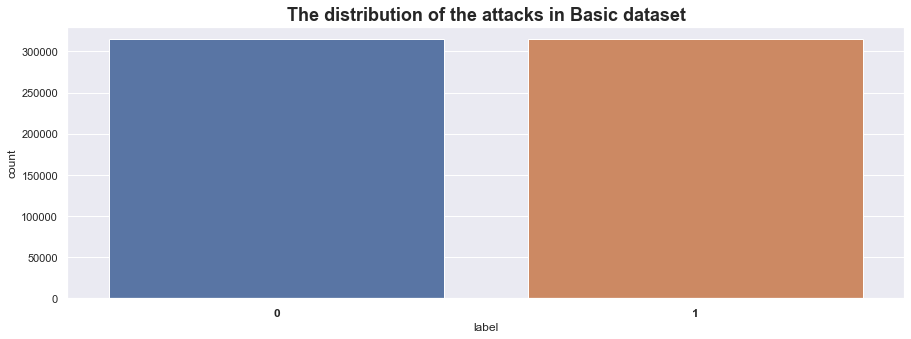

In [9]:
# Plotting target label distribution
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
sns.countplot(basic['label'])
plt.title('The distribution of the attacks in Basic dataset', weight='bold', fontsize='18')
plt.xticks(weight='bold', fontsize=12)
plt.show()

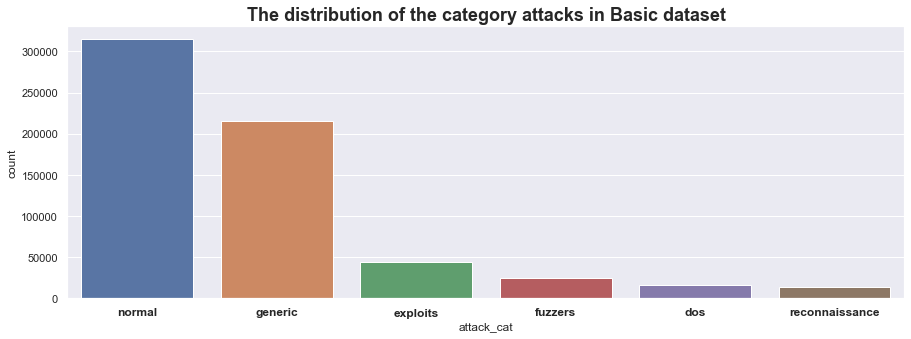

In [10]:
# Plotting attack category distribution
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
sns.countplot(basic['attack_cat'], order = basic['attack_cat'].value_counts().index)
plt.title('The distribution of the category attacks in Basic dataset', weight='bold', fontsize='18')
plt.xticks(weight='bold', fontsize=12)
plt.show()

In [11]:
# Shuffle dataframe
basic=basic.sample(frac=1)

In [12]:
# Generate UNSW-NB15-Train-Basic
n=basic.shape[0]
basic_train = basic.iloc[:round(0.75*n),:] # 75% of dataset
basic_test = basic.iloc[round(0.75*n):,:] # 25% of dataset

## UNSW-NB15-Train-Basic


In [13]:
all_0, all_1 = basic_train['label'].value_counts()[0]*100 / len(basic_train.index), basic_train['label'].value_counts()[1]*100 / len(basic_train.index)

print("In Train-Basic dataset: there are {} % of normal traffic and {} % of attacks".format(all_0, all_1))

In Train-Basic dataset: there are 50.01610551656325 % of normal traffic and 49.98389448343675 % of attacks


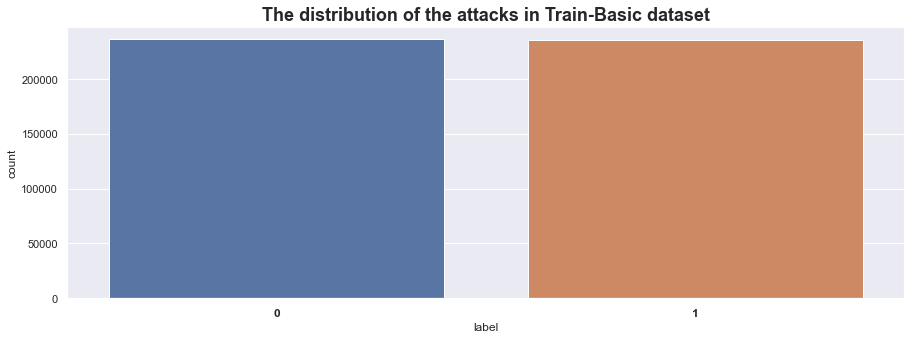

In [14]:
# Plotting target label distribution
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
sns.countplot(basic_train['label'])
plt.title('The distribution of the attacks in Train-Basic dataset', weight='bold', fontsize='18')
plt.xticks(weight='bold', fontsize=12)
plt.show()

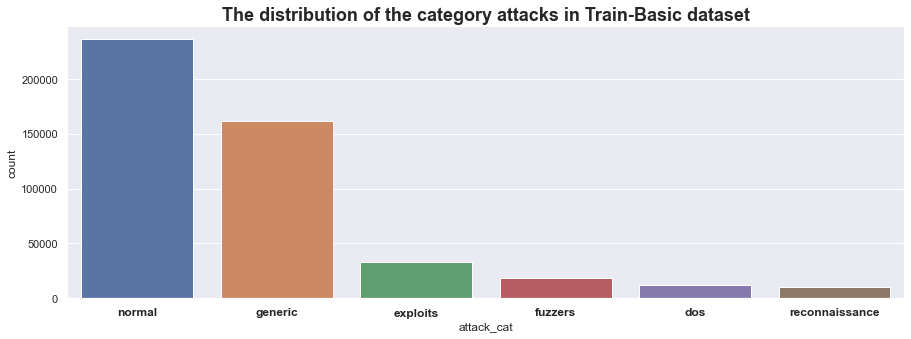

In [15]:
# Plotting attack category distribution
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
sns.countplot(basic_train['attack_cat'], order = basic_train['attack_cat'].value_counts().index)
plt.title('The distribution of the category attacks in Train-Basic dataset', weight='bold', fontsize='18')
plt.xticks(weight='bold', fontsize=12)
plt.show()

In [16]:
basic_train['attack_cat'].value_counts()

normal            236020
generic           161672
exploits           33261
fuzzers            18142
dos                12225
reconnaissance     10568
Name: attack_cat, dtype: int64

## UNSW-NB15-Test-Basic

In [17]:
all_0, all_1 = basic_test['label'].value_counts()[0]*100 / len(basic_test.index), basic_test['label'].value_counts()[1]*100 / len(basic_test.index)

print("In Test-Basic dataset: there are {} % of normal traffic and {} % of attacks".format(all_0, all_1))

In Test-Basic dataset: there are 49.95168345031024 % of normal traffic and 50.04831654968976 % of attacks


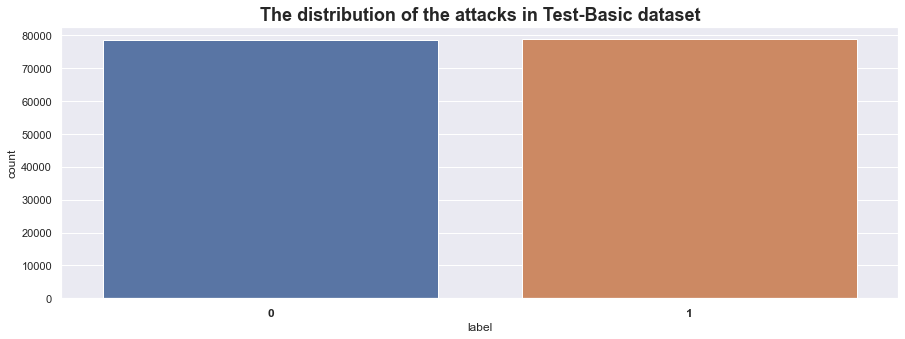

In [18]:
# Plotting target label distribution
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
sns.countplot(basic_test['label'])
plt.title('The distribution of the attacks in Test-Basic dataset', weight='bold', fontsize='18')
plt.xticks(weight='bold', fontsize=12)
plt.show()

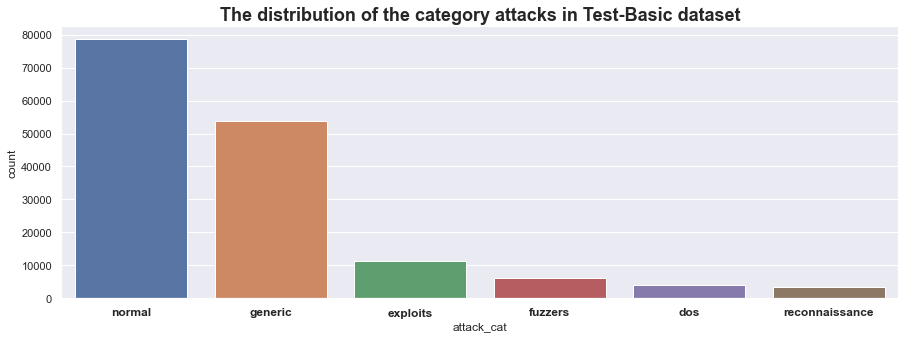

In [19]:
# Plotting attack category distribution
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
sns.countplot(basic_test['attack_cat'], order = basic_test['attack_cat'].value_counts().index)
plt.title('The distribution of the category attacks in Test-Basic dataset', weight='bold', fontsize='18')
plt.xticks(weight='bold', fontsize=12)
plt.show()

In [20]:
basic_test['attack_cat'].value_counts()

normal            78572
generic           53809
exploits          11264
fuzzers            6104
dos                4128
reconnaissance     3419
Name: attack_cat, dtype: int64

# UNSW-NB15-Test+

In [21]:
# Creating the Test+ dataset
test_plus = pd.concat([normal, analysis, backdoor, shellcode, worms])

In [22]:
# Balancing the dataset to obtain 50/50% attacks/normal traffic
test_plus=balance_dataset(test_plus)

In [23]:
all_0, all_1 = test_plus['label'].value_counts()[0]*100 / len(test_plus.index), test_plus['label'].value_counts()[1]*100 / len(test_plus.index)

print("In Basic dataset: there are {} % of normal traffic and {} % of attacks".format(all_0, all_1))

In Basic dataset: there are 50.0 % of normal traffic and 50.0 % of attacks


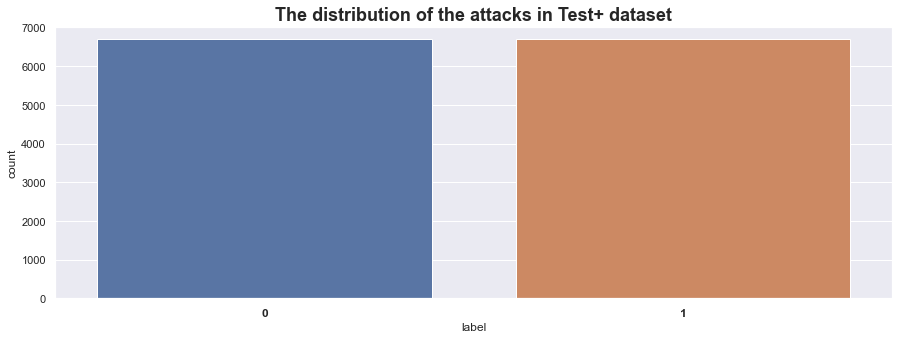

In [24]:
# Plotting target label distribution
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
sns.countplot(test_plus['label'])
plt.title('The distribution of the attacks in Test+ dataset', weight='bold', fontsize='18')
plt.xticks(weight='bold', fontsize=12)
plt.show()

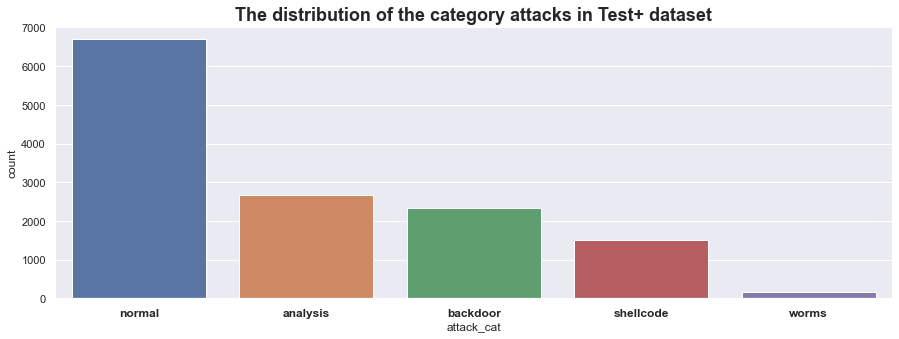

In [25]:
# Plotting attack category distribution
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
sns.countplot(test_plus['attack_cat'], order = test_plus['attack_cat'].value_counts().index)
plt.title('The distribution of the category attacks in Test+ dataset', weight='bold', fontsize='18')
plt.xticks(weight='bold', fontsize=12)
plt.show()

In [26]:
test_plus['attack_cat'].value_counts()

normal       6691
analysis     2677
backdoor     2329
shellcode    1511
worms         174
Name: attack_cat, dtype: int64

In [26]:
# Exporting the 2 generated datasets
basic.to_csv('../datasets/UNSW-NB15-Basic.csv', index=False)
basic_train.to_csv('../datasets/UNSW-NB15-Train-Basic.csv', index=False)
basic_test.to_csv('../datasets/UNSW-NB15-Test-Basic.csv', index=False)
test_plus.to_csv('../datasets//UNSW-NB15-Test+.csv', index=False)